In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import sklearn

For this notebook to work, you need to have scikit-learn version 1.0 or above. Run the cell below to check the version you have installed. If it is less than 1.0, make sure you install the new version before continuing by going to the command line and using the command `conda install scikit-learn=1.0`

In [2]:
print(sklearn.__version__)

1.2.1


# Regression Tree Parameters

In this notebook you will explore how model parameters can affect the quality of prediction. 

First we create the dataset. 

In [2]:
np.random.seed(234) # do not change the random seed, this will ensure reproducibility in results

#This line generates an array x of shape (10, 1) (10 rows and 1 column) with random numbers. The numbers are drawn from a uniform distribution between 0 and 10. In a uniform distribution, all numbers within the specified range are equally likely to be drawn.
x = np.random.uniform(0, 10, (10, 1))

#This defines a function named true_function. It takes a single argument x.
def true_function(x):
    return -(1.4 - 3.0 * x) * np.sin(x)

y = true_function(x)

**To Do** vary the hyperparameters of the regression trees below to create the best and worst regression trees you can. Upload your image in insendi. Which parameters matter the most? Which ones matter the least? 

Use the `help(DecisionTreeRegressor)` function to see what the options for the hyperparameter values are. 

In [5]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [3]:
x_test = np.linspace(0, 10, 100).reshape(100, 1)

In [4]:
#This line suggests a specific version of scikit-learn (0.24.1) and Python (3.8) is required, but it seems to be a part of a package management or environment setup command rather than Python code.

#criterion:The difference in the criterion (squared_error vs. absolute_error) between clf_worst and clf_best suggests a comparison of how different error metrics affect the performance of regression trees.
#splitter: default ="best" for choosing the best split or "random" for choosing the best random split.
#max_depth: the maximum depth of the tree.
#min_samples_split=2: The minimum number of samples required to split an internal node.
#min_samples_leaf=3: The minimum number of samples required to be at a leaf node.
#min_weight_fraction_leaf=0.2: The minimum weighted fraction of the sum total of weights required to be at a leaf node.
#max_features=1: The number of features to consider when looking for the best split.
#max_leaf_nodes=2: The maximum number of leaf nodes the tree can have.
#min_impurity_decrease=1.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
#The configuration of clf_worst and clf_best seems to be intentionally suboptimal (likely for demonstration or educational purposes) given the constraints like max_leaf_nodes=2 and min_impurity_decrease=1.0. These settings will likely result in very simple trees that do not model complex relationships well.

equires scikit-learn==0.24.1=py38ha9443f7_0clf_worst = DecisionTreeRegressor(criterion="squared_error",
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

print(clf_worst.criterion)

clf_worst.fit(x, y)

clf_best = DecisionTreeRegressor(criterion='absolute_error',
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

clf_best.fit(x, y)

y_test_worst = clf_worst.predict(x_test)
y_test_best = clf_best.predict(x_test)
y_true = true_function(x_test)

squared_error


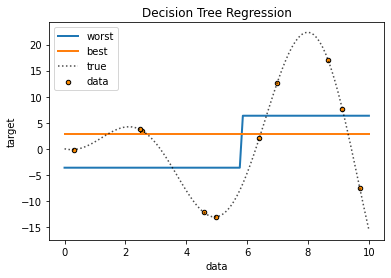

In [5]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_test_worst,  linewidth=2, label='worst')
plt.plot(x_test, y_test_best, linewidth=2, label='best')
plt.plot(x_test, y_true, color='k', linestyle=":", alpha=0.7, label='true')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

To create decision trees that fit the data the best and the worst using DecisionTreeRegressor, you need to adjust parameters that control the complexity of the tree. Here's how you can do it:

Parameters for the Worst-Fitting Tree:
- Maximum Depth (max_depth): Set this to a very low number (e.g., 1 or 2) to make the tree too simplistic.
- Minimum Samples Split (min_samples_split): Set this to a very high number to prevent the tree from creating meaningful splits.
- Minimum Samples Leaf (min_samples_leaf): Similarly, set this to a high number to ensure very few splits.

Parameters for the Best-Fitting Tree:
- Maximum Depth (max_depth): Set this higher, but be cautious as too high a value might lead to overfitting. It often requires cross-validation to find an optimal value.
- Minimum Samples Split (min_samples_split): Lower values (like 2) allow the tree to create more splits.
- Minimum Samples Leaf (min_samples_leaf): Lower values (like 1) can provide more detailed splits, but again, watch out for overfitting.

Text(0.5, 1.0, 'Best-Fitting Decision Tree')

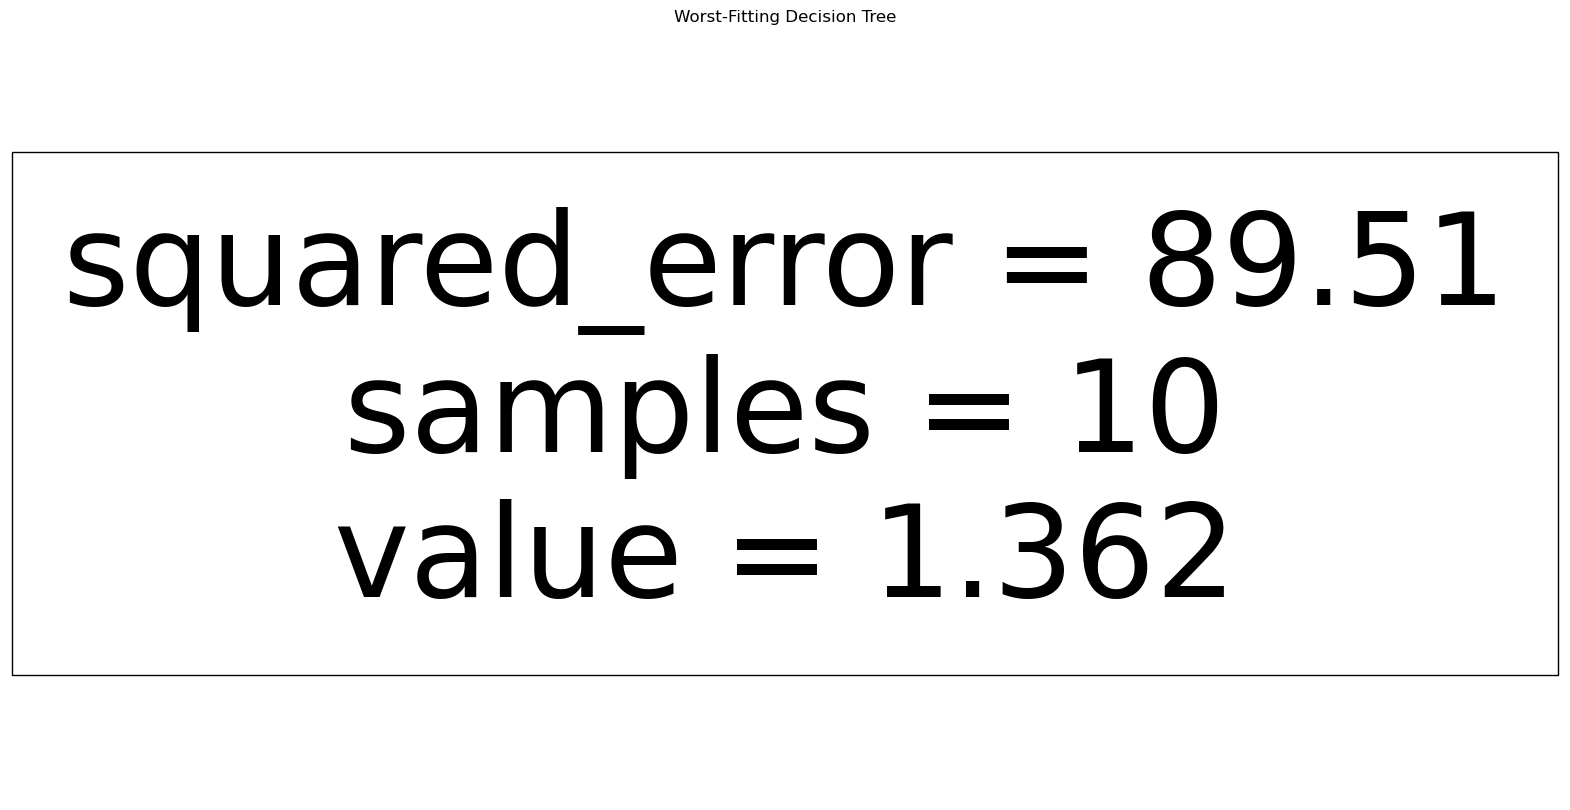

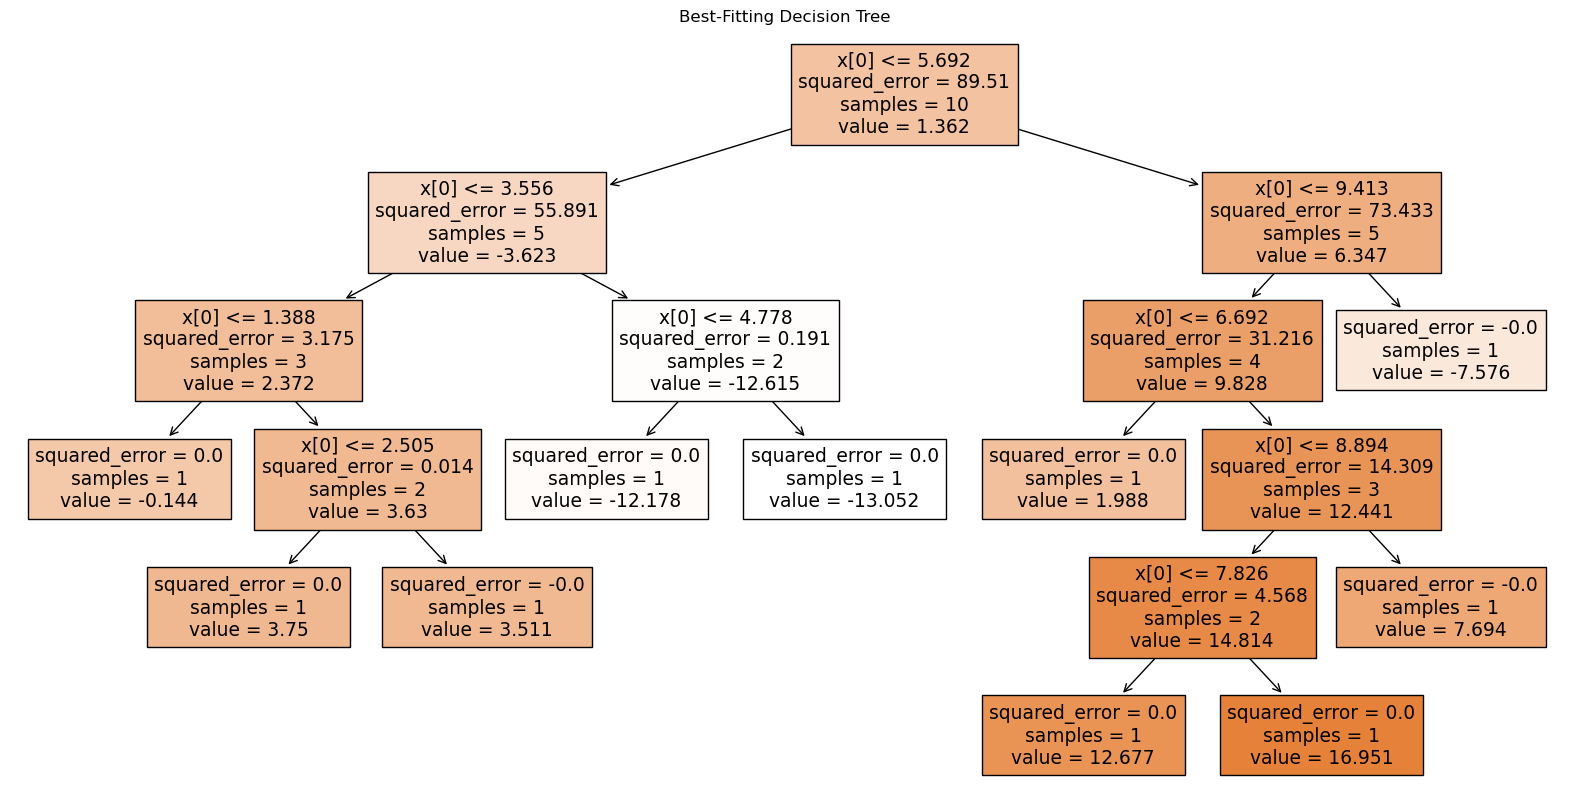

In [10]:
from sklearn.tree import plot_tree

# Creating the worst-fitting tree
tree_worst = DecisionTreeRegressor(max_depth=2, min_samples_split=50, min_samples_leaf=50)
tree_worst.fit(x, y)

# Creating the best-fitting tree
tree_best = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1)
tree_best.fit(x, y)

# Plotting the worst-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_worst, filled=True)
plt.title("Worst-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_worst.png')  # Save to file

# Plotting the best-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_best, filled=True)
plt.title("Best-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_best.png')  # Save to file

Text(0.5, 1.0, 'Best-Fitting Decision Tree')

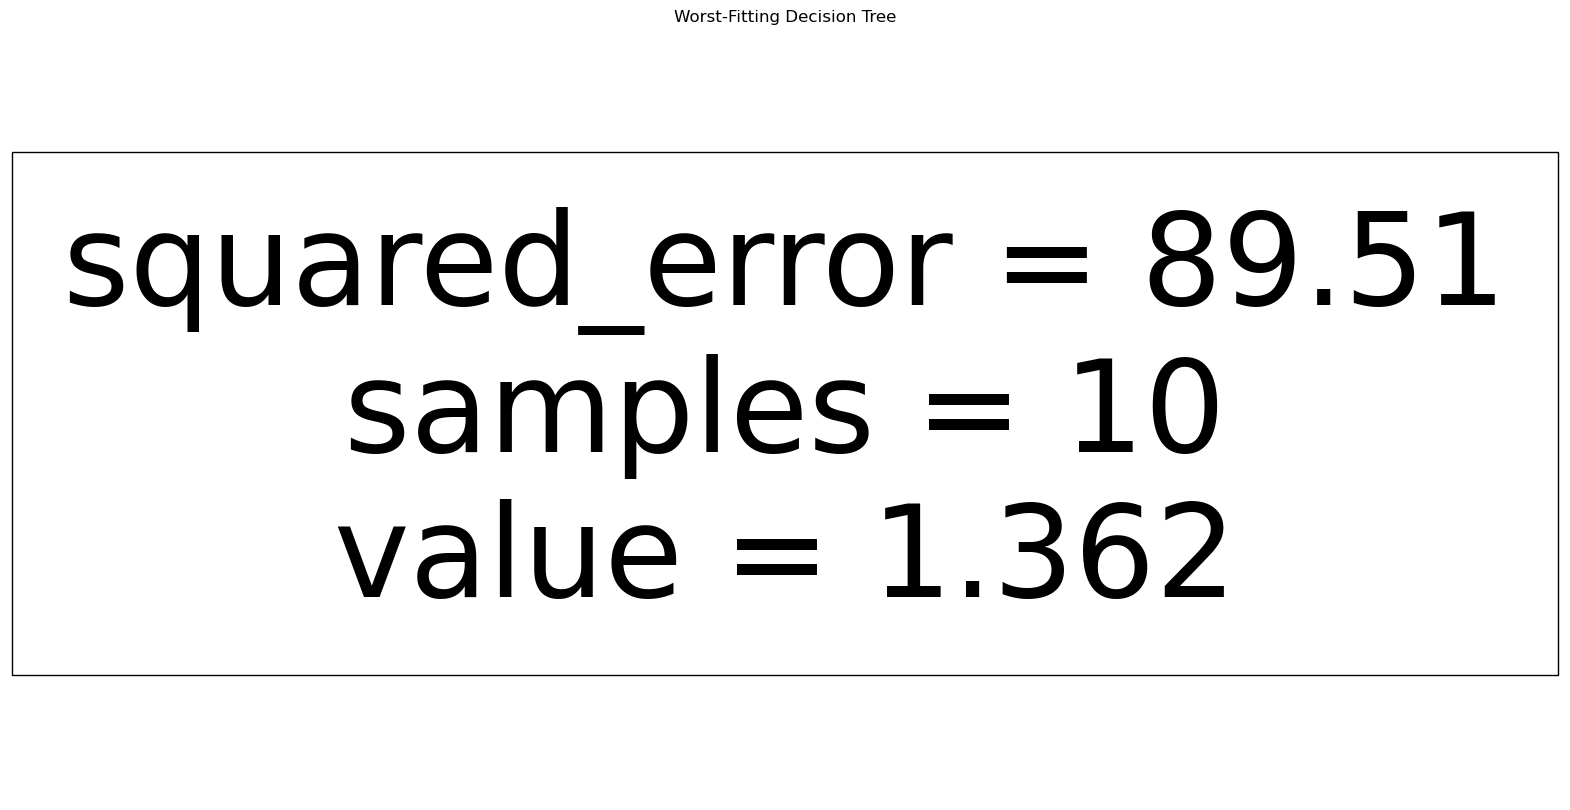

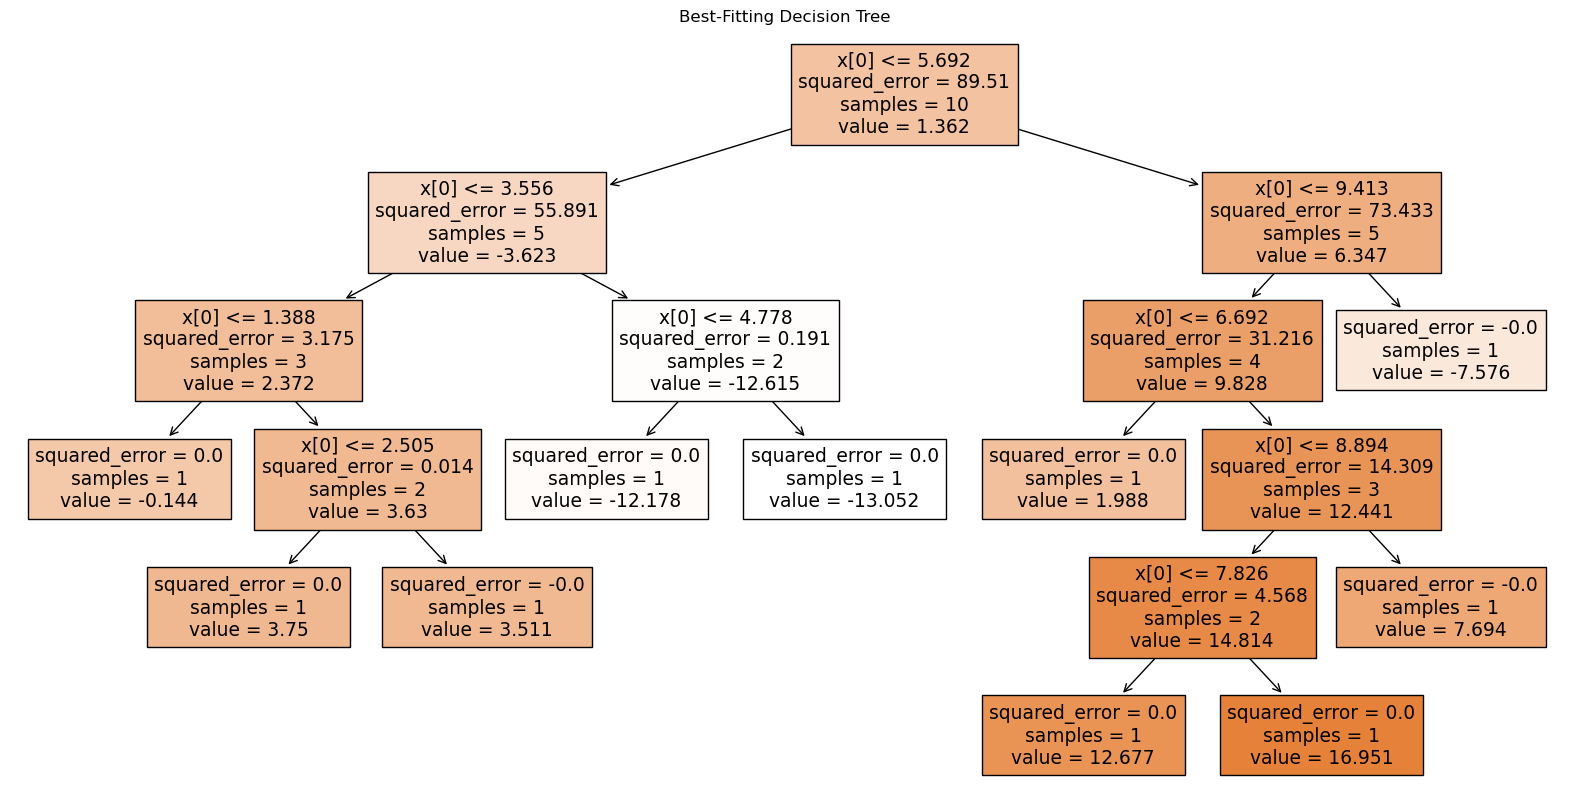

In [4]:
from sklearn.tree import plot_tree

# Creating the worst-fitting tree
tree_worst = DecisionTreeRegressor(max_depth=2, min_samples_split=40, min_samples_leaf=40)
tree_worst.fit(x, y)

# Creating the best-fitting tree
tree_best = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1)
tree_best.fit(x, y)

# Plotting the worst-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_worst, filled=True)
plt.title("Worst-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_worst.png')  # Save to file

# Plotting the best-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_best, filled=True)
plt.title("Best-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_best.png')  # Save to file

#clf_worst = DecisionTreeRegressor(criterion="squared_error",
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

Text(0.5, 1.0, 'Best-Fitting Decision Tree')

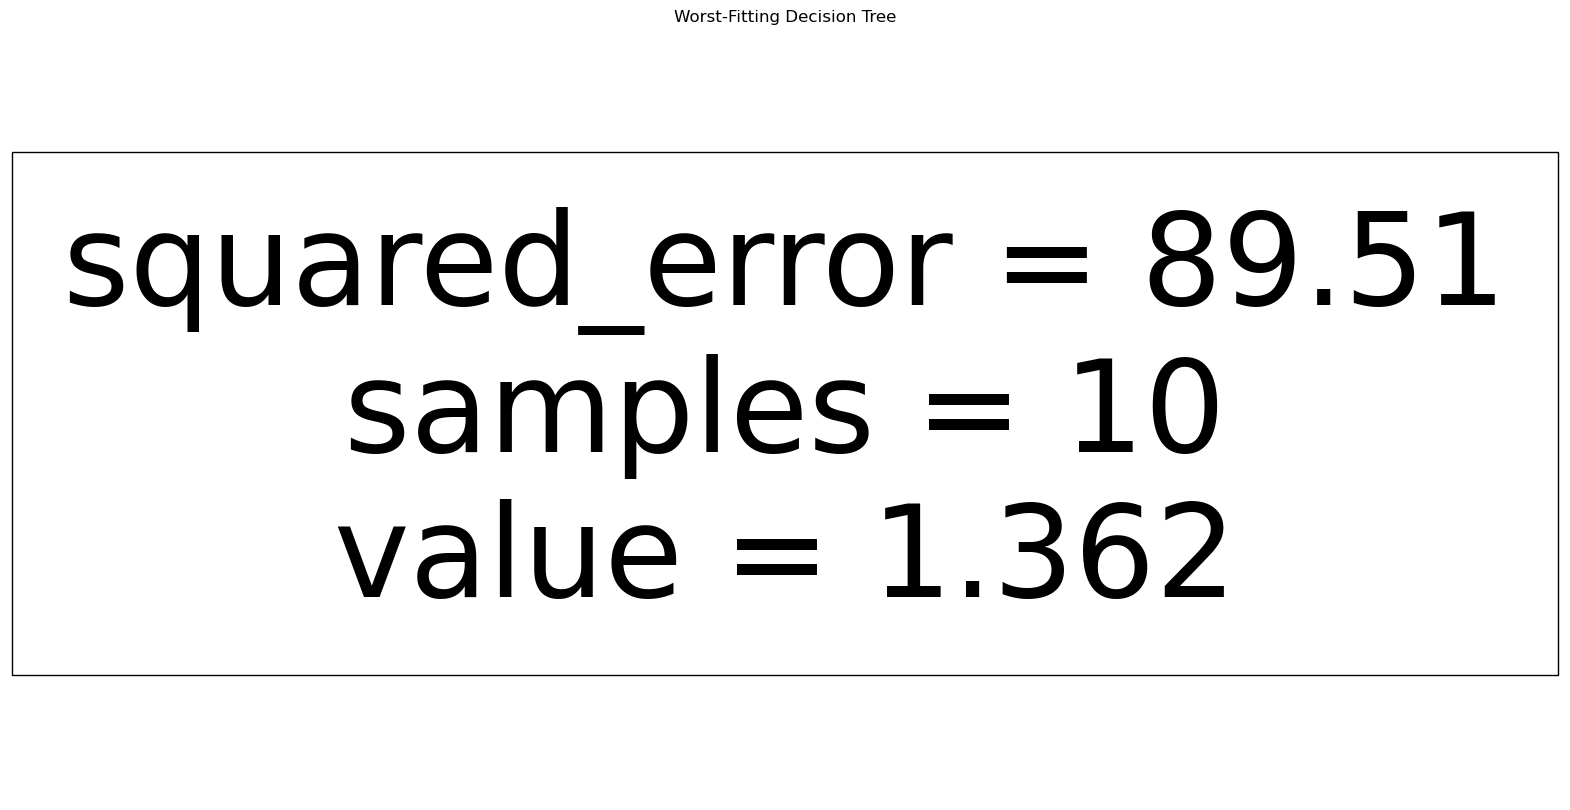

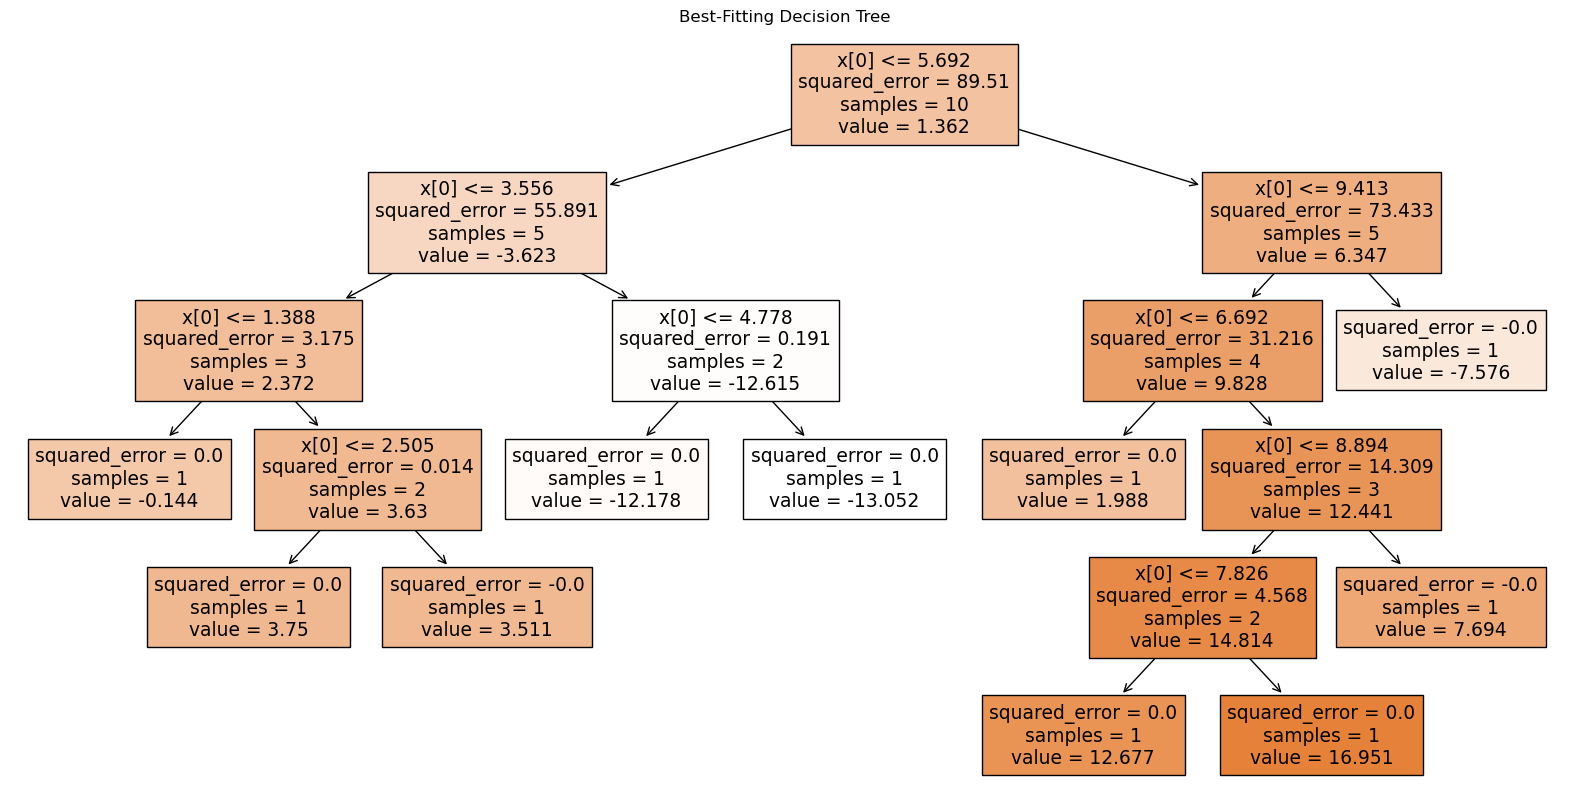

In [7]:
from sklearn.tree import plot_tree

# Creating the worst-fitting tree
tree_worst = DecisionTreeRegressor(criterion="squared_error",
                            splitter='random',max_depth=3, min_samples_split=3, min_samples_leaf=2)
tree_worst.fit(x, y)

# Creating the best-fitting tree
tree_best = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1)
tree_best.fit(x, y)

# Plotting the worst-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_worst, filled=True)
plt.title("Worst-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_worst.png')  # Save to file

# Plotting the best-fitting tree
plt.figure(figsize=(20,10))
plot_tree(tree_best, filled=True)
plt.title("Best-Fitting Decision Tree")
#plt.savefig('/data/decision_tree_best.png')  # Save to file